### Transfer learning in image classification
In this notebook we will use transfer learning and take pre-trained model from google's Tensorflow Hub and re-train that on flowers dataset. Using pre-trained model saves lot of time and computational budget for new classification problem at hand

In [103]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pyplot as plt
import seaborn as sns

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
#!pip install --upgrade tensorflow_hub

In [3]:
IMAGE_SHAPE = (224,224)
classifier = tf.keras.Sequential([
    hub.KerasLayer('https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4',input_shape=IMAGE_SHAPE+(3,))
])

In [4]:
IMAGE_SHAPE+(3,)

(224, 224, 3)

In [19]:
os.chdir('C:\\Users\\jaych\\Downloads\\iAnalyst\\Deep Learning\\Flowers')

In [20]:
os.listdir()

['Bluebell',
 'Buttercup',
 'ColtsFoot',
 'CowSlip',
 'Crocus',
 'Daffodil',
 'Daisy',
 'Dandelion',
 'Fritilary',
 'Iris',
 'LilyValley',
 'Pansy',
 'Snowdrop',
 'Sunflower',
 'Tigerlily',
 'Tulip',
 'Windflower']

In [9]:
data_dir = ('C:\\Users\\jaych\\Downloads\\iAnalyst\\Deep Learning\\Flowers')

In [10]:
type(data_dir )

str

In [11]:
import pathlib
data_dir = pathlib.Path(data_dir)
data_dir

WindowsPath('C:/Users/jaych/Downloads/iAnalyst/Deep Learning/Flowers')

In [12]:
type(data_dir)

pathlib.WindowsPath

In [13]:
image_count = len(list(data_dir.glob('*/*.jpg')))
image_count

1360

In [136]:
Sunflower = list(data_dir.glob('Sunflower/*'))
Sunflower[:2]

[WindowsPath('C:/Users/jaych/Downloads/iAnalyst/Deep Learning/Flowers/Sunflower/image_0721.jpg'),
 WindowsPath('C:/Users/jaych/Downloads/iAnalyst/Deep Learning/Flowers/Sunflower/image_0722.jpg')]

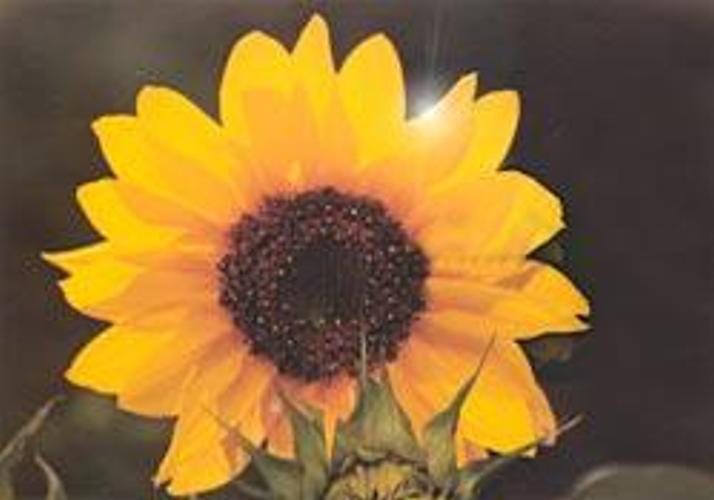

In [139]:
Image.open(Sunflower[-1])

#### Read flowers images from disk into numpy array using opencv

In [29]:
np.array(os.listdir())

array(['Bluebell', 'Buttercup', 'ColtsFoot', 'CowSlip', 'Crocus',
       'Daffodil', 'Daisy', 'Dandelion', 'Fritilary', 'Iris',
       'LilyValley', 'Pansy', 'Snowdrop', 'Sunflower', 'Tigerlily',
       'Tulip', 'Windflower'], dtype='<U10')

In [55]:
classes = ['Bluebell', 'Buttercup', 'ColtsFoot', 'CowSlip', 'Crocus',
       'Daffodil', 'Daisy', 'Dandelion', 'Fritilary', 'Iris',
       'LilyValley', 'Pansy', 'Snowdrop', 'Sunflower', 'Tigerlily',
       'Tulip', 'Windflower']

In [64]:
from tqdm import tqdm
flowers_image_dict  = {}
flowers_label_dict = {}
for idx, flower in tqdm(enumerate(classes)):
    #print(classes[idx])
    flowers_image_dict[classes[idx]] = list(data_dir.glob(classes[idx]+'/*'))
    flowers_label_dict[classes[idx]] = idx

17it [00:00, 177.29it/s]


In [69]:
img = cv2.imread(str(flowers_image_dict['Tulip'][-1]))
img.shape

(500, 547, 3)

In [70]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [71]:
from tqdm import tqdm
X,y = [],[]
for flower_name, images in tqdm(flowers_image_dict.items()):
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(224,224))
        X.append(resized_img)
        y.append(flowers_label_dict[flower_name])

100%|██████████████████████████████████████████████████████████████████████████████████| 17/17 [00:17<00:00,  1.01s/it]


In [72]:
X = np.array(X)
y = np.array(y)

#### Train test Split

In [73]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test = train_test_split(X,y,random_state=101)

#### Preprocessing : Scaling images

In [74]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

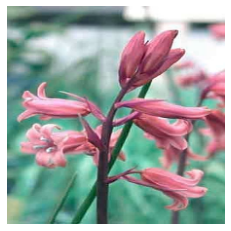

In [75]:
plt.axis('off')
plt.imshow(X[1])

#### Make prediction using pre-trained model on new flowers dataset

In [76]:
predicted =  classifier.predict(np.array([X[0],X[1],X[2]]))
predicted = np.argmax(predicted, axis=1)
predicted

array([795, 722, 722], dtype=int64)

### Now take pre-trained model and retrain it using flowers images

In [77]:
feature_extracter_model = 'https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4'
pretrained_model_without_top_layer = hub.KerasLayer(feature_extracter_model,
                                                   input_shape=(224,224,3),trainable=False)   #model was trained with input shape(224,224,3)

In [87]:
num_of_flowers =17

model = tf.keras.Sequential([
    pretrained_model_without_top_layer,
    tf.keras.layers.Dense(num_of_flowers)
])

model.compile(optimizer='adam',
             loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             metrics='accuracy')

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense_4 (Dense)             (None, 17)                21777     
                                                                 
Total params: 2,279,761
Trainable params: 21,777
Non-trainable params: 2,257,984
_________________________________________________________________


In [88]:
model.fit(X_train_scaled, y_train, epochs=10)

Epoch 1/10
32/32 [==============================] - 25s 742ms/step - loss: 1.9643 - accuracy: 0.4235
Epoch 2/10
32/32 [==============================] - 21s 652ms/step - loss: 0.6845 - accuracy: 0.8627
Epoch 3/10
32/32 [==============================] - 21s 647ms/step - loss: 0.3942 - accuracy: 0.9294
Epoch 4/10
32/32 [==============================] - 21s 645ms/step - loss: 0.2713 - accuracy: 0.9588
Epoch 5/10
32/32 [==============================] - 21s 644ms/step - loss: 0.2062 - accuracy: 0.9725
Epoch 6/10
32/32 [==============================] - 21s 651ms/step - loss: 0.1571 - accuracy: 0.9853
Epoch 7/10
32/32 [==============================] - 26s 823ms/step - loss: 0.1270 - accuracy: 0.9863
Epoch 8/10
32/32 [==============================] - 24s 747ms/step - loss: 0.1044 - accuracy: 0.9941
Epoch 9/10
32/32 [==============================] - 20s 634ms/step - loss: 0.0873 - accuracy: 0.9971
Epoch 10/10
32/32 [==============================] - 20s 612ms/step - loss: 0.0753 - accura

In [89]:
model.evaluate(X_test_scaled,y_test)

11/11 [==============================] - 8s 646ms/step - loss: 0.3297 - accuracy: 0.9059


[0.32965192198753357, 0.9058823585510254]

### Prediction on test data

In [128]:
predictions = model.predict(X_test_scaled)
predictions = [pred.argmax() for pred in predictions]

In [131]:
predictions[:10]

[15, 13, 12, 1, 3, 5, 10, 16, 0, 10]

In [132]:
y_test[:10]

array([15, 13, 12,  1,  5,  5, 10, 16,  0, 10])

<AxesSubplot:>

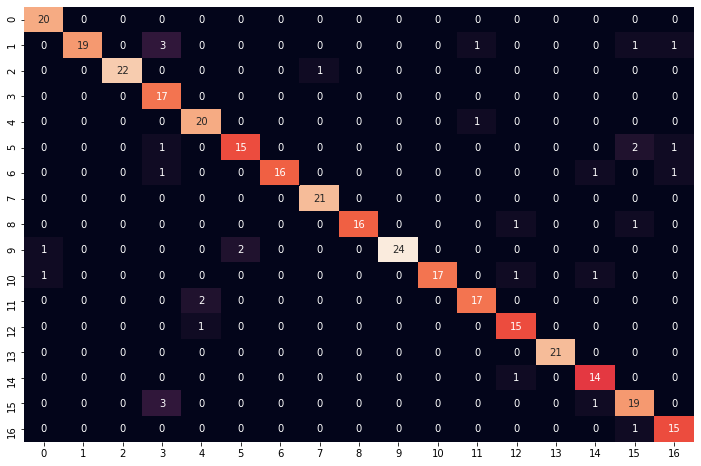

In [106]:
plt.figure(figsize=(12,8))
sns.heatmap(confusion_matrix(y_test,predictions),annot=True,cbar=False)

In [100]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95        20
           1       1.00      0.76      0.86        25
           2       1.00      0.96      0.98        23
           3       0.68      1.00      0.81        17
           4       0.87      0.95      0.91        21
           5       0.88      0.79      0.83        19
           6       1.00      0.84      0.91        19
           7       0.95      1.00      0.98        21
           8       1.00      0.89      0.94        18
           9       1.00      0.89      0.94        27
          10       1.00      0.85      0.92        20
          11       0.89      0.89      0.89        19
          12       0.83      0.94      0.88        16
          13       1.00      1.00      1.00        21
          14       0.82      0.93      0.87        15
          15       0.79      0.83      0.81        23
          16       0.83      0.94      0.88        16

    accuracy              

**Hooray! We got 91% accuracy.**